## Observations and Insights 

In [666]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_metadata 249x5

In [667]:
#study_results 1893x4

# surveyed the data sets and see that Mouse ID is that common column in which we'd like to merge 

In [668]:
mouse_study_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

In [669]:
# Display the data table for preview

In [670]:
mouse_study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [671]:
# Checking the number of mice.

In [672]:
mice_count_all = mouse_study_merge['Mouse ID'].count()
mice_count_all

1893

In [673]:
mice_count = mouse_study_merge['Mouse ID'].unique()
mice_count_unique = len(mice_count)
mice_count_unique

249

In [674]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
####duplicate_init = mouse_study_merge.groupby(['Mouse ID']).count()['Timepoint']
####duplicate_init

duplicates_init = mouse_study_merge.sort_values('Mouse ID')
#duplicates_init
len(duplicates_init)

1893

In [675]:
timepoint_duplicates = duplicates_init.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
len(timepoint_duplicates)

#looks to be successful, as this dropped 5/10 rows -- I'm not sure wheather to pick first, last, keep=False drops all Duplicate rows.

1888

In [676]:
# Optional: Get all the data for the duplicate mouse ID. 

In [677]:
duplicated_timepoints = mouse_study_merge[mouse_study_merge.duplicated(subset=['Mouse ID','Timepoint'])]
duplicated_timepoints

### so g989 Mouse was duplicated in the data. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [678]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.



In [679]:
# Checking the number of mice in the clean DataFrame.
## should be 1888 line items and 249 unique mice here....

In [680]:
clean_data = timepoint_duplicates

In [681]:
len(clean_data)

1888

## Summary Statistics

In [682]:
drug_regimen = clean_data.groupby('Drug Regimen')
#drug_regimen_tumor_vol = drug_regimen.loc['Tumor Volume(mm3)']

drug_regimen
# drug_reg_counts = drug_regimen.count()


In [683]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

t_vol_mean = drug_regimen['Tumor Volume (mm3)'].mean()
t_vol_median = drug_regimen['Tumor Volume (mm3)'].median()
t_vol_variance = drug_regimen['Tumor Volume (mm3)'].var()
t_vol_std_dev = drug_regimen['Tumor Volume (mm3)'].std()
t_vol_sem = drug_regimen['Tumor Volume (mm3)'].sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.

t_vol_stats = pd.DataFrame({'Tumor Size Mean': round(t_vol_mean,3), 
                           'Tumor Size Median': round(t_vol_median,3),
                           'Tumor Size Variance': round(t_vol_variance,3),
                           'Tumor Size Std Dev': round(t_vol_std_dev,3),
                         'Tumor Size SEM': round(t_vol_sem,3),
                           })
t_vol_stats

,Tumor Size Mean,Tumor Size Median,Tumor Size Variance,Tumor Size Std Dev,Tumor Size SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.389,50.910,43.116,6.566,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [684]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen2 = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# t_vol_stats2 = pd.DataFrame({'Tumor Size Mean': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#               'Tumor Size Median': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#               'Tumor Size Variance': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#               'Tumor Size Std Dev': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#                })

drug_regimen2

# This method produces everything in a single groupby function

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.389178  50.909965  43.116372  6.566306  0.525725
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [685]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# regimen_count = clean_data.groupby('Drug Regimen')
# mice_ID_list = regimen_count['Drug Regimen'].unique()
# mice_ID_list

regimen_count = clean_data['Drug Regimen'].value_counts()  ## this agg's number of partiulcar value rather than counting all the rows 
regimen_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

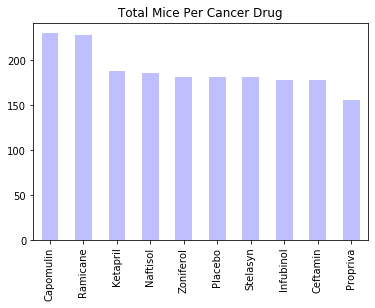

In [621]:
regimen_count.plot(title='Total Mice Per Cancer Drug', kind='bar', color='blue', alpha=0.25, align='center')


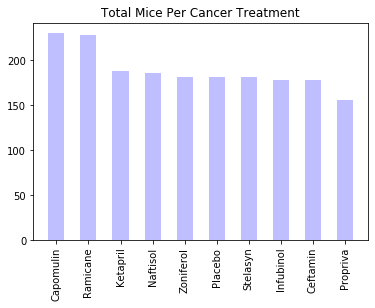

In [622]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#mice_per_drug = regimen_count.count()['Mouse ID']
#mice_per_drug
#type(mice_per_drug) <-- this is a series 

#### some useful stuff here:
# data = {'a': np.arange(50),
#         'c': np.random.randint(0, 50, 50),
#         'd': np.random.randn(50)}
# data['b'] = data['a'] + 10 * np.random.randn(50)
# data['d'] = np.abs(data['d']) * 100

# plt.scatter('a', 'b', c='c', s='d', data=data)
# plt.xlabel('entry a')
# plt.ylabel('entry b')
# plt.show()


# drugs = mice_ID_list.to_list()
# values = mice_per_drug.to_list()
# plt.figure(figsize=(9, 3))




plt.bar(regimen_count.index.values, height=regimen_count.values, color='blue', alpha=0.25, align='center', width=.5)
#ply.xticks()
#plt.suptitle('Mice Per Drug')
plt.title('Total Mice Per Cancer Treatment')
#plt.xlabel('Drug Regimen') ## Originally had this in, took it out so charts 'look identical'
plt.xticks(rotation=90)
#plt.ylabel('Mice Count')  ## Originally had this in, took it out so charts 'look identical'
plt.show()

In [623]:
#below few lines is simply my tutor and I playing with the data. 


type(regimen_count)

## df  is a bunch of series'

pandas.core.series.Series

In [624]:
regimen_count.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 156])

In [837]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Will first need to find this count::
male_female = pd.DataFrame(clean_data.groupby('Drug Regimen')['Sex'].count())
male_female

,Sex
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [838]:
#male_female_count = male_female['Mouse ID'].value_counts()
#male_female_count

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4c127c910>],
      dtype=object)

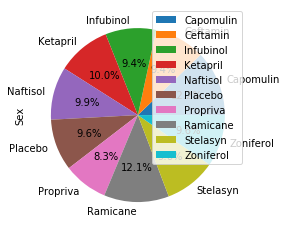

In [839]:
male_female.plot(kind='pie', subplots=True, autopct="%1.1f%%")


In [840]:
#### need to get labels on these

In [841]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(male_famale, autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

NameError: name 'male_famale' is not defined

## Quartiles, Outliers and Boxplots

In [630]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

## Grabbing the four treatments stated:
four_reg = clean_data.loc[(clean_data['Drug Regimen']=='Capomulin') |
                         (clean_data['Drug Regimen']=='Ramicane') |
                         (clean_data['Drug Regimen']=='Infubinol') |
                         (clean_data['Drug Regimen']=='Ceftamin')]
four_reg.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1


In [631]:
# Start by getting the last (greatest) timepoint for each mouse

# from looking at the data I know the I could grab all the 45's, but maybe some of them didn't go the whole 45 trial length. 
four_reg_max = pd.DataFrame(clean_data.groupby(['Mouse ID'])['Timepoint'].max())
four_reg_max.head()
# the output here gives me 249 items, so I know I correctly have 1 max timepoint for every mouse in the original dataset. 

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [632]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_outlier_data = pd.merge(four_reg, four_reg_max, on='Mouse ID', how='outer')
four_outlier_data

four_outlier_data.describe()

## this contains all data and labeled each Mouse with an extra max timepoint 
## Timepoint_x == org data point
## Timepoint_y == MAX data doint


,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
count,814.000000,814.000000,814.000000,814.000000,814.000000,963.000000
mean,13.240786,23.092138,20.386978,45.822556,0.823096,39.267913
std,7.545419,4.515395,14.177018,8.293726,0.963367,11.085046
min,1.000000,15.000000,0.000000,22.050126,0.000000,0.000000
25%,7.000000,19.000000,10.000000,40.220171,0.000000,40.000000
50%,13.000000,24.000000,20.000000,45.000000,1.000000,45.000000
75%,20.000000,27.000000,30.000000,50.356471,1.000000,45.000000
max,24.000000,30.000000,45.000000,72.226731,4.000000,45.000000


In [633]:
four_outlier_data_clean = four_outlier_data[four_outlier_data["Timepoint_x"]== four_outlier_data['Timepoint_y']]
four_outlier_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
7,a203,Infubinol,Female,20.0,23.0,45.0,67.973419,2.0,45
18,a251,Infubinol,Female,21.0,25.0,45.0,65.525743,1.0,45
29,a275,Ceftamin,Female,20.0,28.0,45.0,62.999356,3.0,45
39,a411,Ramicane,Male,3.0,22.0,45.0,38.407618,1.0,45
45,a444,Ramicane,Female,10.0,25.0,45.0,43.047543,0.0,45


In [634]:
#four_outlier_data_clean.sort_values(by='Tumor Volume (mm3)', ascending=False)
#four_outlier_data_clean

In [635]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [782]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = four_outlier_data["Drug Regimen"].unique().tolist()
treatments

# there's something wrong here because I'm finding a NaN Drug Regimen, which should not be the case. 

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin', nan]

In [783]:
# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol = []

#??????
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
#### not sure what this means but I can snag the column of tumor size with .to_list()
tumor_size_capomulin = four_outlier_data_clean.loc[four_outlier_data_clean['Drug Regimen']=='Capomulin', 'Tumor Volume (mm3)']
#len(tumor_size_capomulin)

In [784]:
tumor_size_infubinol = four_outlier_data_clean.loc[four_outlier_data_clean['Drug Regimen']=='Infubinol', 'Tumor Volume (mm3)']
tumor_size_ceftamin = four_outlier_data_clean.loc[four_outlier_data_clean['Drug Regimen']=='Ceftamin', 'Tumor Volume (mm3)']
tumor_size_ramicane = four_outlier_data_clean.loc[four_outlier_data_clean['Drug Regimen']=='Ramicane', 'Tumor Volume (mm3)']

    # add subset 

quarts_capomulin = tumor_size_capomulin.quantile([.25,.5,.75])
quarts_infubinol = tumor_size_infubinol.quantile([.25,.5,.75])
quarts_ceftamin = tumor_size_ceftamin.quantile([.25,.5,.75])
quarts_ramicane = tumor_size_ramicane.quantile([.25,.5,.75])

In [785]:
#tumor_size_infubinol 

In [786]:
#tumor_size_ceftamin

In [787]:
#tumor_size_ramicane

In [788]:
# tumor_size_nan = four_outlier_data_clean.loc[four_outlier_data_clean['Drug Regimen']=='nan', 'Tumor Volume (mm3)']
# tumor_size_nan
#### this is an empty series, so why is it coming up in the list???


In [789]:
quarts_capomulin

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [790]:
quarts_infubinol

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64

In [791]:
quarts_ceftamin

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64

In [792]:
quarts_ramicane

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64

In [793]:
    # Determine outliers using upper and lower bounds
Q1_capomulin = quarts_capomulin[0.25]
Q3_capomulin = quarts_capomulin[0.75]
IQR_capomulin = Q3_capomulin - Q1_capomulin   

Lb_capomulin = Q1_capomulin - (1.5*IQR_capomulin)
Ub_capomulin = Q3_capomulin + (1.5*IQR_capomulin)

outliers_capomulin = quarts_capomulin.loc[(quarts_capomulin < Lb_capomulin) | (quarts_capomulin > Ub_capomulin)]
outliers_capomulin

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [794]:
Q1_infubinol = quarts_infubinol[0.25]
Q3_infubinol = quarts_infubinol[0.75]
IQR_infubinol = Q3_infubinol - Q1_infubinol  

Lb_infubinol = Q1_infubinol - (1.5*IQR_infubinol)
Ub_infubinol = Q3_infubinol + (1.5*IQR_infubinol)

outliers_infubinol = quarts_infubinol.loc[(quarts_infubinol < Lb_infubinol) | (quarts_infubinol > Ub_infubinol)]
outliers_infubinol2 = pd.DataFrame(outliers_infubinol)
outliers_infubinol2
## This should have an outlier according to my box plots... this is why I did the dataframe to check

,Tumor Volume (mm3)


In [795]:
Q1_ceftamin = quarts_ceftamin[0.25]
Q3_ceftamin = quarts_ceftamin[0.75]
IQR_ceftamin = Q3_ceftamin - Q1_ceftamin  

Lb_ceftamin = Q1_ceftamin - (1.5*IQR_ceftamin)
Ub_ceftamin = Q3_ceftamin + (1.5*IQR_ceftamin)

outliers_ceftamin = quarts_ceftamin.loc[(quarts_ceftamin < Lb_ceftamin) | (quarts_ceftamin > Ub_ceftamin)]
outliers_ceftamin

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [796]:
Q1_ramicane = quarts_ramicane[0.25]
Q3_ramicane = quarts_ramicane[0.75]
IQR_ramicane = Q3_ramicane - Q1_ramicane  

Lb_ramicane = Q1_ramicane - (1.5*IQR_ramicane)
Ub_ramicane = Q3_ramicane + (1.5*IQR_ramicane)

outliers_ramicane = quarts_ramicane.loc[(quarts_ramicane < Lb_ramicane) | (quarts_ramicane > Ub_ramicane)]
outliers_ramicane

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [797]:
##### I realize now that the data above could've been pulled via loop.  The assignment didn't specfically ask for this.
##### However, the starter notebook hinted at it and several classmates are slack-ing aboue it.  If I have time I will come back and play with a loop.


AttributeError: 'Text' object has no property 'xlabels'

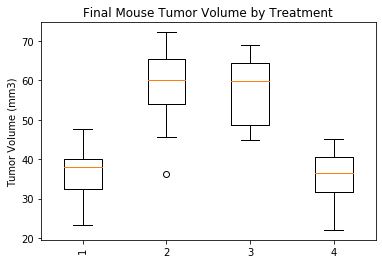

In [817]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_data_to_plot = [tumor_size_capomulin, tumor_size_infubinol, tumor_size_ceftamin, tumor_size_ramicane]
tumor_data_labels = ['Capomulin', 'Infubinol', 'Ceftamin', 'Ramicane']

plt.boxplot(tumor_data_to_plot)

plt.title('Final Mouse Tumor Volume by Treatment')
plt.ylabel('Tumor Volume (mm3)')

### This is all stuff I've tried to get labels on the ticks:::
plt.xticks(rotation=90, xlabels=tumor_data_labels)  #<--- got to mess with xticks to get the labels in correctly
#color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
#plt.box(color=color, sym='r+')
#ax.set(xlabel='Year', ylabel='Performance', axisbelow=True, 
#tumor_data_to_plot.set(xticklabels=['Capomulin', 'Infubinol', 'Ceftamin', 'Ramicane'])
#dataframe.set_xticklabels(['Capomulin', 'Infubinol', 'Ceftamin', 'Ramicane'])
#plt.xticks(xlabel=tumor_data_labels)
           
plt.show()

In [813]:
## Data Set #2 above, which I obviously can't get labeled, has the shown outlier. 


## Line and Scatter Plots

In [814]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# pull mouse data treated with Capolumin --- b128

b128_data = clean_data[clean_data['Mouse ID']=='b128']
b128_data.sort_values('Timepoint')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


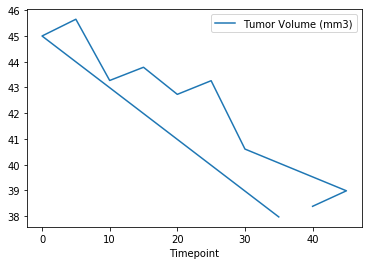

In [800]:
b128_data.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')

In [801]:
## I can't get this to start at 0 timeline 


In [802]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

## I'm starting from the larger dataframe four_reg I made above in the quartile exercise:
capomulin_reg = clean_data.loc[(clean_data['Drug Regimen']=='Capomulin')]
capomulin_reg.head()
# this correctly has 230 lines. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2
306,b128,Capomulin,Female,9,22,30,40.605335,1
305,b128,Capomulin,Female,9,22,25,43.262145,1
304,b128,Capomulin,Female,9,22,20,42.731552,0


In [803]:
# the average tumor size amoungst these:

avg_tumor_vol = capomulin_reg.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#avg_tumor_vol

In [804]:
# the average weight of the mice is:

avg_mouse_weight = capomulin_reg.groupby('Mouse ID')['Weight (g)'].mean()
#avg_mouse_weight

In [805]:
# Since both are grouped by Mouse ID I can merge on that....

weight_vs_tumor = pd.merge(avg_tumor_vol, avg_mouse_weight, on='Mouse ID', how='outer')
weight_vs_tumor.head()

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


In [806]:
# Now I can simply plot! 

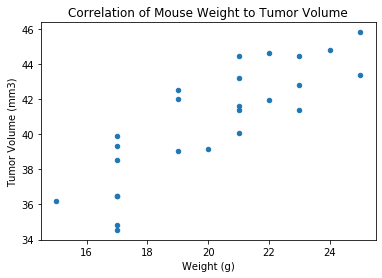

In [807]:
weight_vs_tumor.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', marker='o')
plt.title('Correlation of Mouse Weight to Tumor Volume')
plt.show()

## Correlation and Regression

In [808]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = sts.pearsonr(avg_tumor_vol, avg_mouse_weight)
print(f"The correlation coefficient between Average Tumor Volume and Average Mouse Weight is {round(corr[0],2)}")
print(f"The correlation p-val between Average Tumor Volume and Average Mouse Weight is {corr[1]}")

The correlation coefficient between Average Tumor Volume and Average Mouse Weight is 0.84
The correlation p-val between Average Tumor Volume and Average Mouse Weight is 1.3225722434712388e-07


In [809]:
tumor_slope, tumor_int, tumor_r, tumor_p, tumor_std_err = stats.linregress(avg_mouse_weight, avg_tumor_vol)

In [810]:
tumor_fit = tumor_slope * avg_mouse_weight + tumor_int

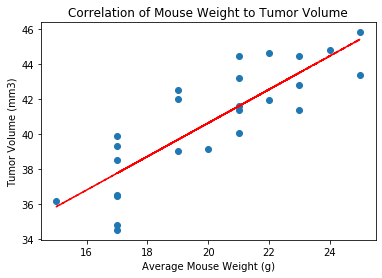

In [811]:

plt.scatter(avg_mouse_weight, avg_tumor_vol)
plt.plot(avg_mouse_weight, tumor_fit, linestyle="--", color='red')

plt.title("Correlation of Mouse Weight to Tumor Volume")
plt.xlabel('Average Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()